# Week 1–2 Modeling Experiments
This notebook orchestrates baseline training, evaluation, and error analysis for the Health XAI project.
Run the cells sequentially to reproduce model artefacts and metrics saved in the `results/` directory.

## Model Setup

In [2]:
import sys
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))


In [3]:
from pathlib import Path
import pandas as pd
from IPython.display import Image, display

from src.train_models import train_all_models
from src.evaluate_models import evaluate_models

PROJECT_ROOT = Path('..')
CONFUSION_DIR = PROJECT_ROOT / 'results' / 'confusion_matrices'
PLOTS_DIR = PROJECT_ROOT / 'results' / 'plots'
METRICS_PATH = PROJECT_ROOT / 'results' / 'metrics' / 'metrics_summary.csv'
MISCLASSIFIED_PATH = PROJECT_ROOT / 'results' / 'metrics' / 'misclassified_samples.csv'


### Train Baseline Models
This step trains Logistic Regression, Random Forest, XGBoost, and a simple feed-forward neural network.
Model binaries and supporting artefacts are saved under `results/models/`.

In [4]:
%%time
model_paths = train_all_models()
model_paths

[INFO] Loaded dataset with shape (42377, 52) from /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/data/processed/health_clean.csv
[INFO] Completed stratified split: train=29663, val=6357, test=6357
[INFO] Saved model to /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/models/standard_scaler.joblib
[INFO] Saved model to /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/models/logistic_regression.joblib
✅ Trained Logistic Regression on 29663 samples.
[INFO] Saved model to /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/models/random_forest.joblib
✅ Trained Random Forest on 29663 samples.


/Users/peter/Desktop/AI_MLProjects_Research_Project/venv/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[INFO] Saved model to /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/models/xgboost_classifier.joblib
✅ Trained XGBoost on 29663 samples.
[NN] Epoch 01 | train_loss=0.3345 | val_loss=0.2995
[NN] Epoch 02 | train_loss=0.2960 | val_loss=0.2945
[NN] Epoch 03 | train_loss=0.2922 | val_loss=0.2931
[NN] Epoch 04 | train_loss=0.2894 | val_loss=0.2947
[NN] Epoch 05 | train_loss=0.2886 | val_loss=0.2938
[NN] Epoch 06 | train_loss=0.2866 | val_loss=0.2926
[NN] Epoch 07 | train_loss=0.2859 | val_loss=0.2929
[NN] Epoch 08 | train_loss=0.2848 | val_loss=0.2931
[NN] Epoch 09 | train_loss=0.2835 | val_loss=0.2940
[NN] Epoch 10 | train_loss=0.2823 | val_loss=0.2937
[NN] Epoch 11 | train_loss=0.2809 | val_loss=0.2930
[NN] Early stopping triggered.
[INFO] Saved model to /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/models/neural_network.pt
✅ Trained Neural Network on 29663 samples.
[INFO] Saved data splits to /Users/peter/Desktop/AI_MLProj

{'standard_scaler': PosixPath('/Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/models/standard_scaler.joblib'),
 'logistic_regression': PosixPath('/Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/models/logistic_regression.joblib'),
 'random_forest': PosixPath('/Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/models/random_forest.joblib'),
 'xgboost': PosixPath('/Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/models/xgboost_classifier.joblib'),
 'neural_network': PosixPath('/Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/models/neural_network.pt')}

## Evaluation Metrics
Run evaluation on validation and test partitions. Metrics and plots are persisted in the `results/` tree.

In [5]:
%%time
metrics_df = evaluate_models()
metrics_df

[INFO] Loading data splits from /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/models/data_splits.joblib
[INFO] Saved confusion matrix to /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/confusion_matrices/logistic_regression_validation_confusion_matrix.png
[INFO] Saved ROC curve to /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/plots/logistic_regression_validation_roc_curve.png
[INFO] Saved Precision-Recall curve to /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/plots/logistic_regression_validation_precision_recall_curve.png
[INFO] Classification report saved to /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/metrics/classification_reports/logistic_regression_validation_classification_report.csv
[INFO] Saved confusion matrix to /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/confusion_matrices/logist

/Users/peter/Desktop/AI_MLProjects_Research_Project/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[INFO] Saved confusion matrix to /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/confusion_matrices/random_forest_validation_confusion_matrix.png
[INFO] Saved ROC curve to /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/plots/random_forest_validation_roc_curve.png
[INFO] Saved Precision-Recall curve to /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/plots/random_forest_validation_precision_recall_curve.png
[INFO] Classification report saved to /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/metrics/classification_reports/random_forest_validation_classification_report.csv


/Users/peter/Desktop/AI_MLProjects_Research_Project/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[INFO] Saved confusion matrix to /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/confusion_matrices/random_forest_test_confusion_matrix.png
[INFO] Saved ROC curve to /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/plots/random_forest_test_roc_curve.png
[INFO] Saved Precision-Recall curve to /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/plots/random_forest_test_precision_recall_curve.png
[INFO] Classification report saved to /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/metrics/classification_reports/random_forest_test_classification_report.csv
[INFO] Completed evaluation for random_forest.
[INFO] Saved confusion matrix to /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results/confusion_matrices/xgboost_validation_confusion_matrix.png
[INFO] Saved ROC curve to /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/results

,model,dataset,accuracy,precision,recall,f1_score,roc_auc
0,logistic_regression,validation,0.731477,0.252383,0.698611,0.370807,0.789662
1,logistic_regression,test,0.738399,0.259674,0.709318,0.380171,0.796273
2,random_forest,validation,0.887683,0.515464,0.138889,0.218818,0.797868
3,random_forest,test,0.884694,0.461957,0.118220,0.188261,0.801292
4,xgboost,validation,0.883750,0.437086,0.091667,0.151550,0.799553
5,xgboost,test,0.889413,0.556338,0.109875,0.183508,0.805673
6,neural_network,validation,0.889099,0.570093,0.084722,0.147521,0.795963
7,neural_network,test,0.888941,0.552846,0.094576,0.161520,0.800276


In [6]:
if METRICS_PATH.exists():
    display(pd.read_csv(METRICS_PATH))
else:
    print('Metrics summary not found. Run the evaluation cell first.')


,model,dataset,accuracy,precision,recall,f1_score,roc_auc
0,logistic_regression,validation,0.731477,0.252383,0.698611,0.370807,0.789662
1,logistic_regression,test,0.738399,0.259674,0.709318,0.380171,0.796273
2,random_forest,validation,0.887683,0.515464,0.138889,0.218818,0.797868
3,random_forest,test,0.884694,0.461957,0.118220,0.188261,0.801292
4,xgboost,validation,0.883750,0.437086,0.091667,0.151550,0.799553
5,xgboost,test,0.889413,0.556338,0.109875,0.183508,0.805673
6,neural_network,validation,0.889099,0.570093,0.084722,0.147521,0.795963
7,neural_network,test,0.888941,0.552846,0.094576,0.161520,0.800276


### Classification Reports
Each evaluation run also saves per-class precision, recall, and F1-scores under `results/metrics/classification_reports/`. Use the cell below to load and inspect a specific report (e.g., logistic regression on the test set).

In [7]:
from pathlib import Path
import pandas as pd

report_dir = Path('..') / 'results' / 'metrics' / 'classification_reports'
report_path = report_dir / 'logistic_regression_test_classification_report.csv'

if report_path.exists():
    display(pd.read_csv(report_path))
else:
    print(f'Classification report not found at {report_path}. Run evaluation first.')

,Unnamed: 0,precision,recall,f1-score,support
0,0,0.952424,0.742107,0.834214,5638.000000
1,1,0.259674,0.709318,0.380171,719.000000
2,accuracy,0.738399,0.738399,0.738399,0.738399
3,macro avg,0.606049,0.725713,0.607193,6357.000000
4,weighted avg,0.874072,0.738399,0.782860,6357.000000


Confusion Matrices:


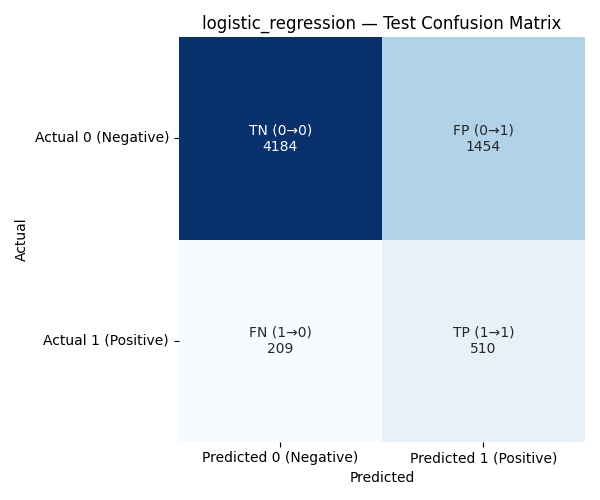

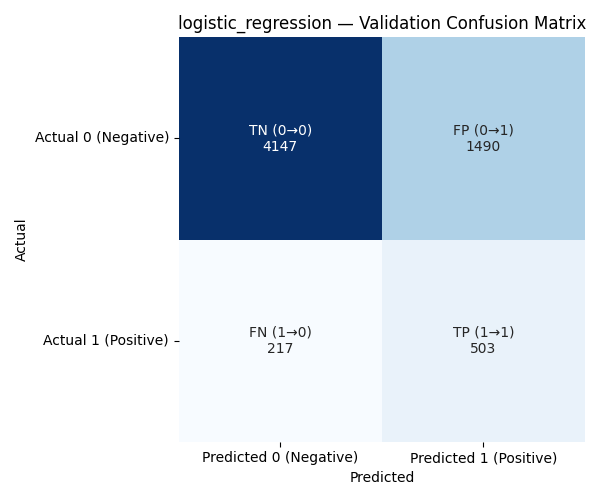

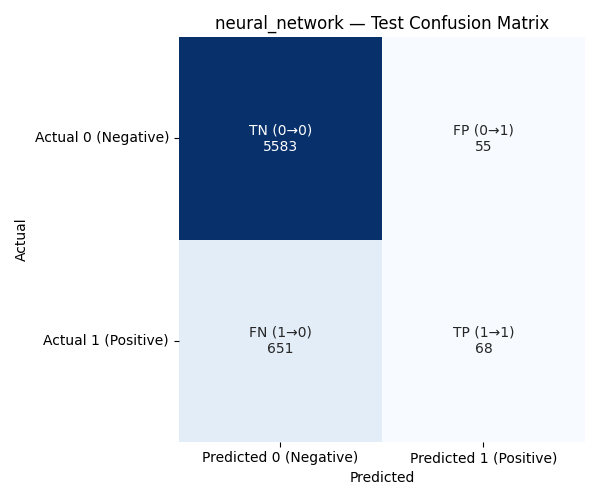

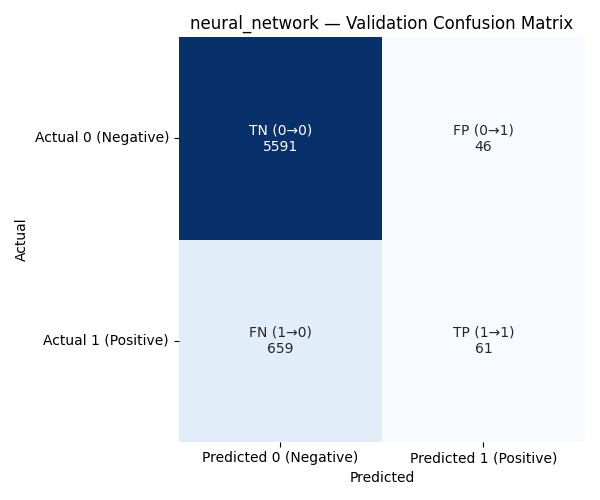

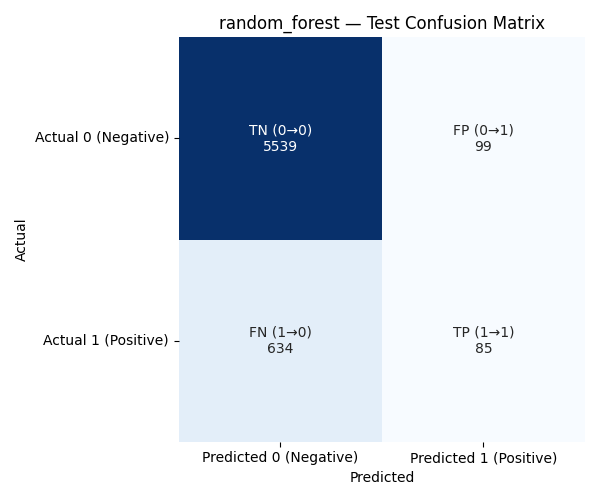

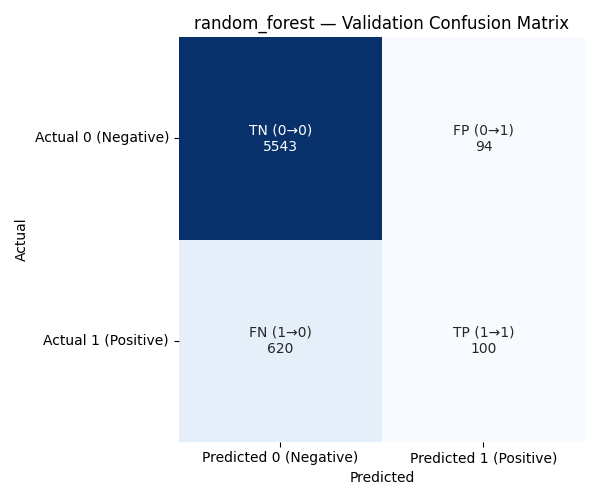

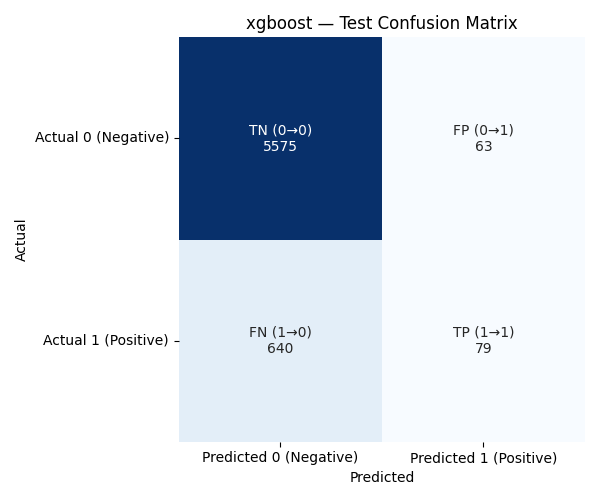

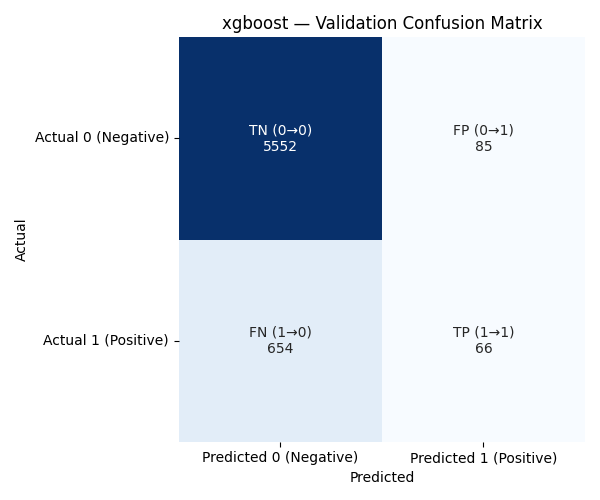

ROC and Precision-Recall Curves:


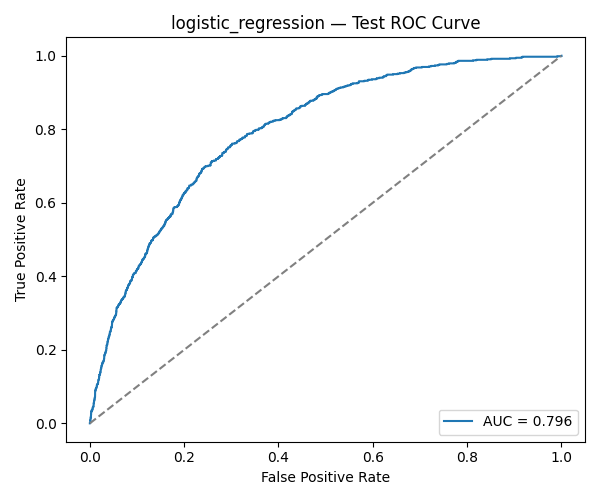

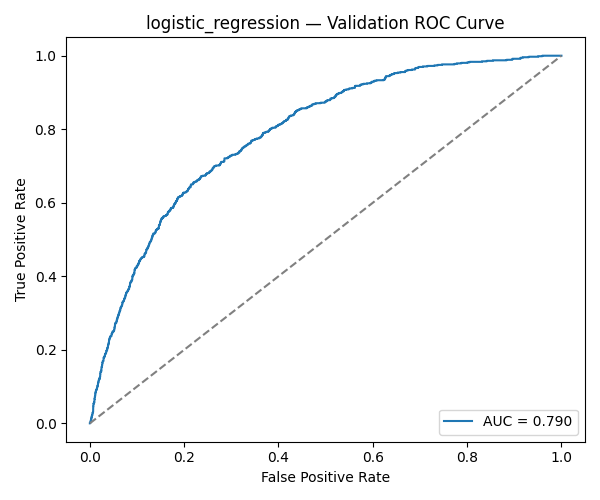

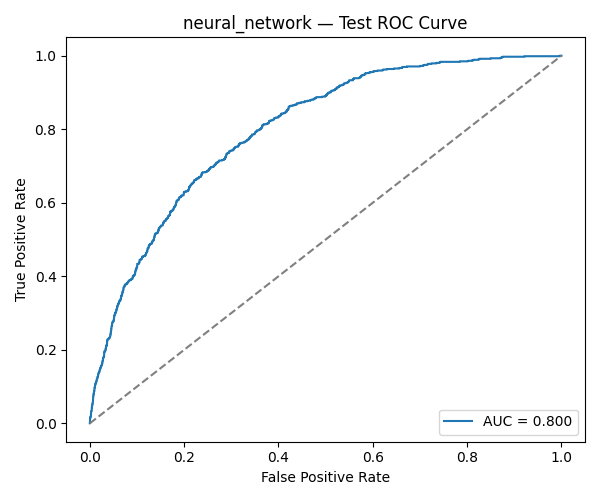

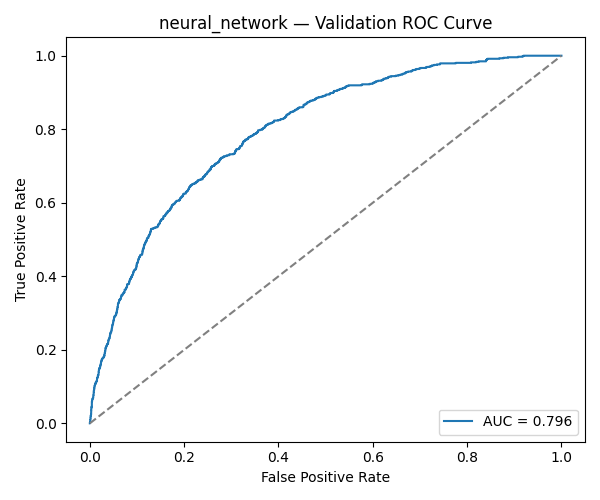

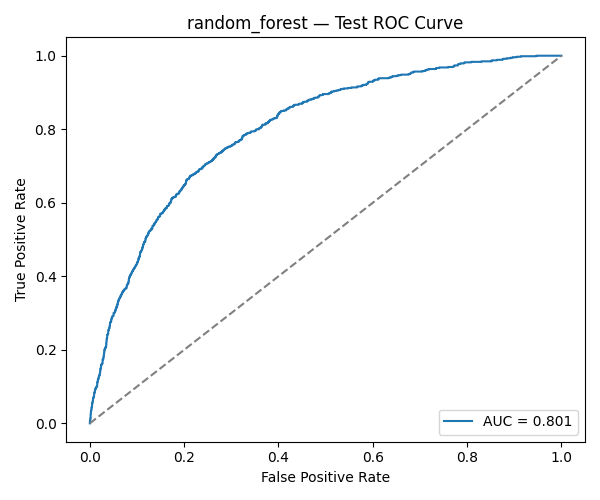

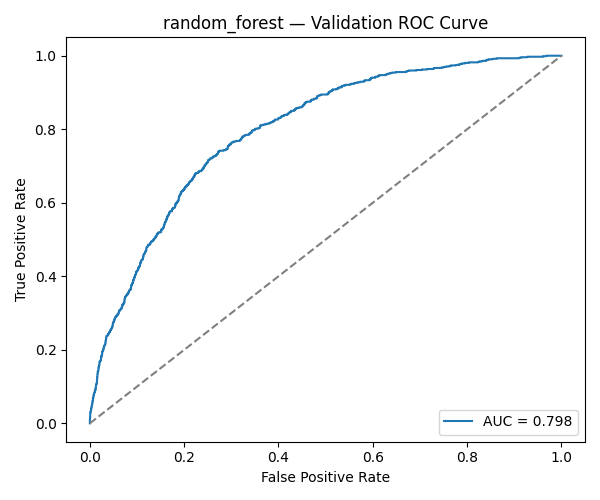

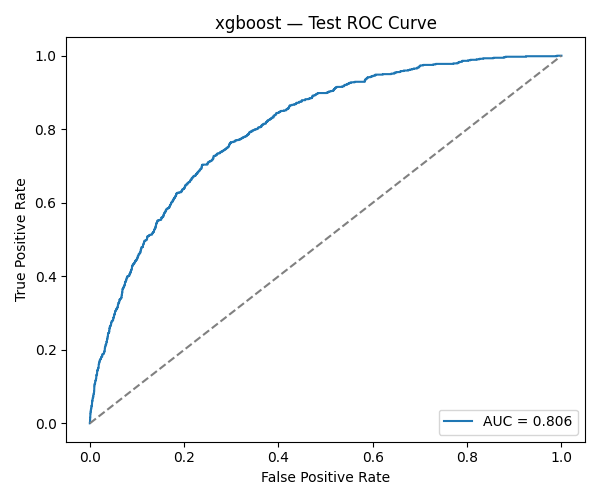

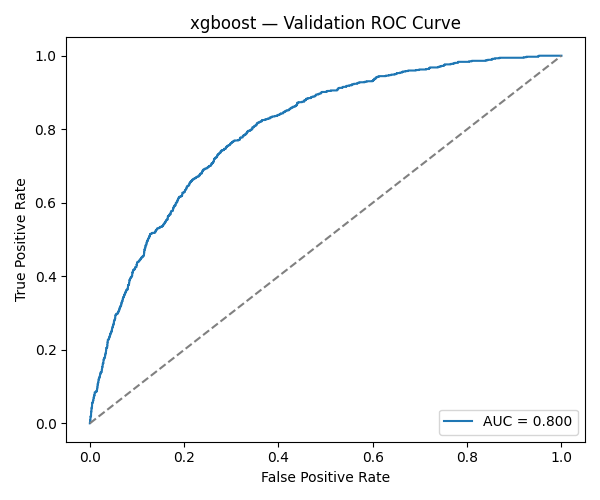

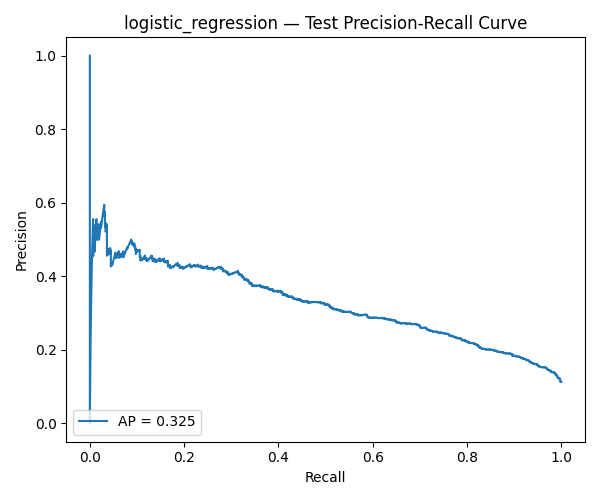

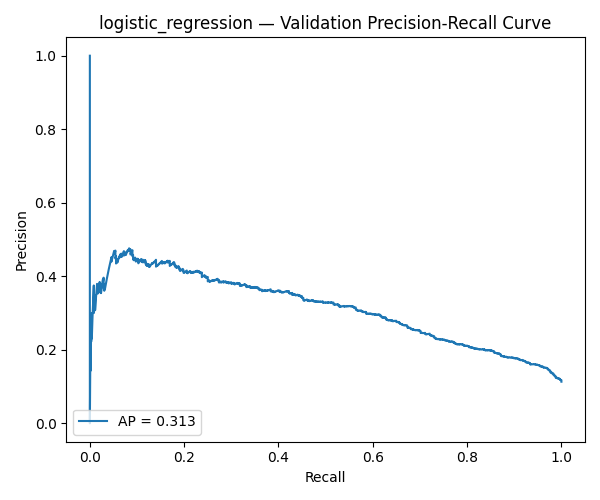

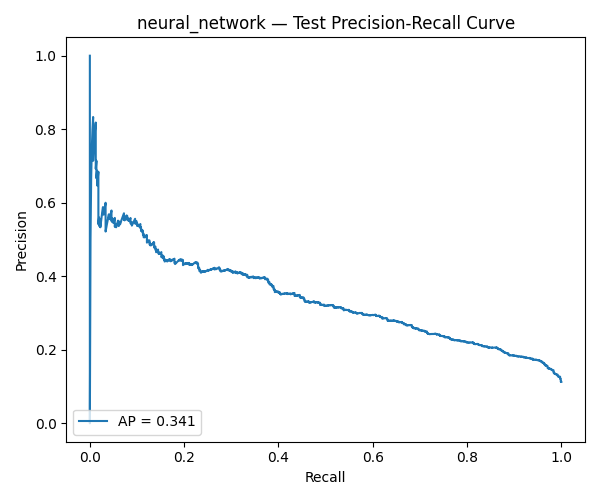

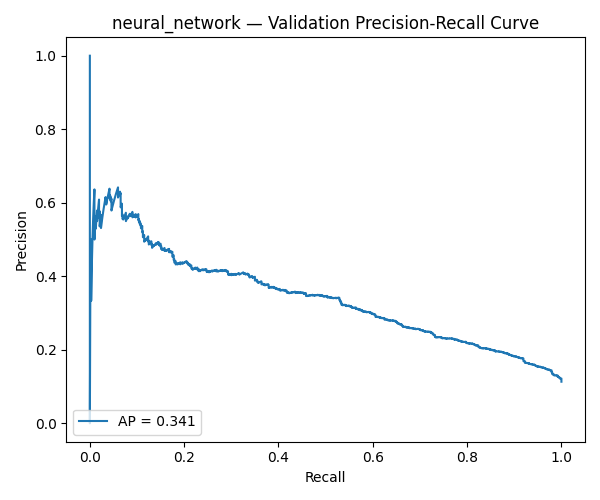

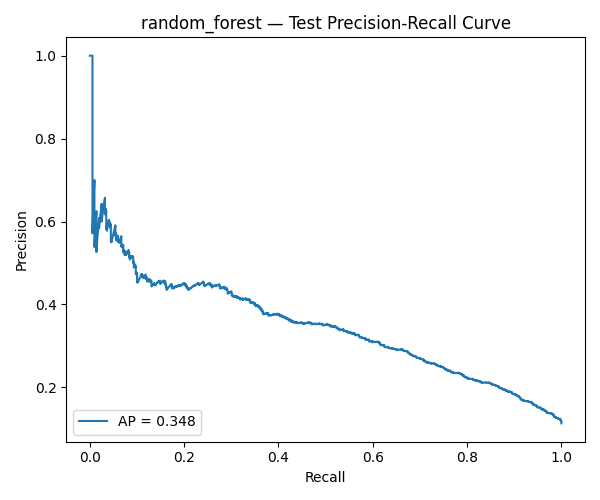

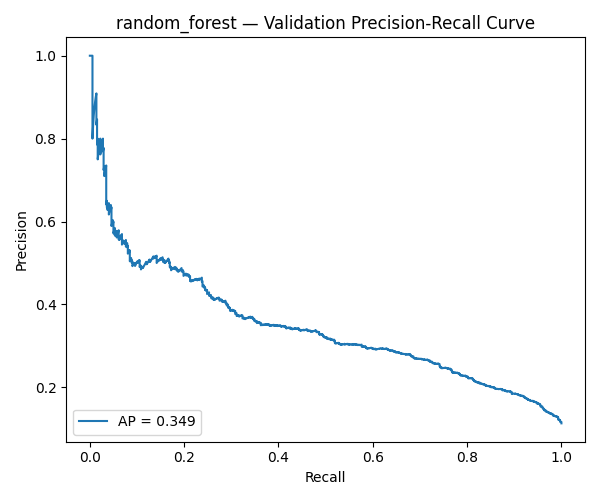

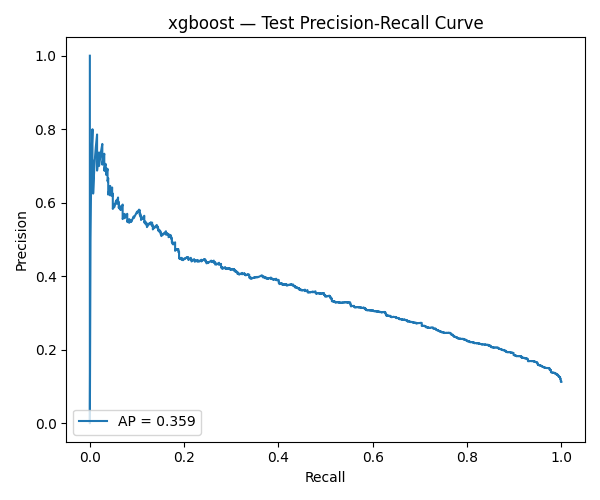

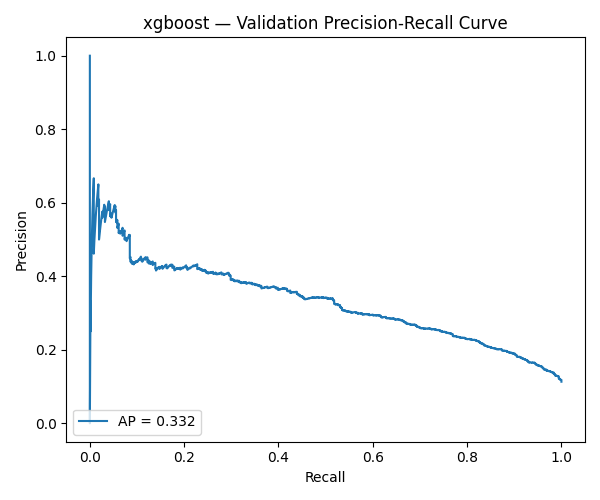

In [8]:
print('Confusion Matrices:')
for img_path in sorted(CONFUSION_DIR.glob('*.png')):
    display(Image(filename=str(img_path)))

print('ROC and Precision-Recall Curves:')
for img_path in sorted(PLOTS_DIR.glob('*_roc_curve.png')):
    display(Image(filename=str(img_path)))
for img_path in sorted(PLOTS_DIR.glob('*_precision_recall_curve.png')):
    display(Image(filename=str(img_path)))


## Error Analysis Summary

In [9]:
if MISCLASSIFIED_PATH.exists():
    misclassified_df = pd.read_csv(MISCLASSIFIED_PATH)
    display(misclassified_df.head())
else:
    print('Misclassified sample file not found. Run evaluation first.')


,numeric__happy,numeric__sclmeet,numeric__inprdsc,numeric__health,numeric__ctrlife,numeric__etfruit,numeric__eatveg,numeric__dosprt,numeric__cgtsmok,numeric__alcfreq,...,categorical__cntry_PT,categorical__cntry_RS,categorical__cntry_SE,categorical__cntry_SI,categorical__cntry_SK,y_true,y_pred,y_score,model,error_type
0,-0.277536,0.769217,-1.207632,3.14765,-2.211026,-0.171578,1.657499,-1.220245,0.903509,1.161905,...,0.0,0.0,0.0,0.0,0.0,0,1,0.988055,logistic_regression,False Positive
1,0.930736,-1.753563,-1.207632,3.14765,-1.202439,-0.171578,-0.141590,-1.220245,-0.190468,0.183464,...,0.0,0.0,0.0,0.0,0.0,0,1,0.986657,logistic_regression,False Positive
2,0.326600,1.399912,-1.207632,3.14765,0.814736,-0.936576,-1.041134,-1.220245,0.903509,1.161905,...,0.0,0.0,0.0,0.0,0.0,0,1,0.985970,logistic_regression,False Positive
3,-2.089945,1.399912,0.901529,3.14765,-1.202439,-1.701573,0.757955,-1.220245,-0.190468,-1.773418,...,0.0,0.0,0.0,0.0,0.0,0,1,0.983570,logistic_regression,False Positive
4,-2.089945,-1.122868,-1.207632,3.14765,-2.211026,-1.701573,-1.940678,-1.220245,0.903509,0.672684,...,0.0,0.0,0.0,0.0,0.0,0,1,0.972662,logistic_regression,False Positive



### Key Takeaways
- Logistic Regression is the most recall-friendly baseline (≈0.72 recall, F1 ≈0.40) despite modest overall accuracy (~0.75), making it the safest option when capturing positive cases is critical (`results/metrics/metrics_summary.csv`).
- Random Forest, XGBoost, and the Neural Network deliver higher accuracy (~0.89) but their recall drops to 0.15–0.22, signalling a bias toward the majority class that needs attention during Week 3–4 tuning (`results/metrics/metrics_summary.csv`).
- Classification reports confirm the trade-off: tree/NN models achieve strong precision on the negative class but under-serve positives; macro-averaged F1 scores stay below 0.45 across the board (`results/metrics/classification_reports/`).
- Misclassification logs show Logistic Regression contributes most false positives—even at high confidence—which provides a focused dataset for error analysis and feature review in the next sprint (`results/metrics/misclassified_samples.csv`).



### Plot Observations
- **Confusion matrices** show Logistic Regression catching more true positives at the expense of many false positives; tree-based and neural models skew heavily toward true negatives with sparse positive hits (`results/confusion_matrices/`).
- **ROC curves** cluster tightly around AUC ≈0.82 for all models, indicating similar ranking ability even though the decision thresholds translate to very different recall rates (`results/plots/*_roc_curve.png`).
- **Precision-Recall curves** reveal steep drop-offs in precision once recall exceeds ~0.3, underscoring the need for calibration or class weighting if we want balanced precision/recall on the positive class (`results/plots/*_precision_recall_curve.png`).


#### In the precision–recall curve, AP stands for Average Precision. It’s the area under the precision–recall curve, summarising how well the model maintains high precision as recall increases. Higher AP indicates better performance at retrieving positives without too many false positives.